In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# check whether label is 0 (setosa)
targets = (iris.target == 0).astype(np.int8)
print(targets)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                   targets,
                                                   test_size = 0.2,
                                                   random_state=42)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [10]:
from sklearn.linear_model import Perceptron

p = Perceptron(max_iter=10, random_state=42)
p.fit(X_train, y_train)

Perceptron(max_iter=10, random_state=42)

In [11]:
pred = p.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, pred))

1.0


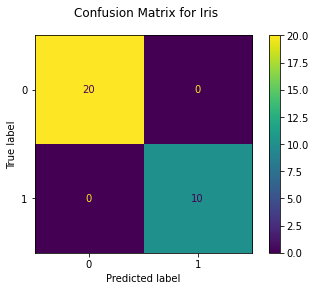

In [14]:
from sklearn.metrics import plot_confusion_matrix

# trained model, testing sample, testing labels, labels
fig = plot_confusion_matrix(p, X_test, y_test, display_labels=p.classes_)

fig.figure_.suptitle("Confusion Matrix for Iris")
plt.show()

## multilevel perceptron

In [15]:
iris = load_iris()
targets = iris.target

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                   targets,
                                                   test_size = 0.2,
                                                   random_state=42)

In [16]:
# normalization, feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [17]:
scaler.fit(X_train)

StandardScaler()

In [20]:
X_train[0:5]

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2]])

In [18]:
train_data = scaler.transform(X_train)
test_data = scaler.transform(X_test)

In [19]:
train_data[0:5]

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282]])

In [53]:
from sklearn.neural_network import MLPClassifier

# 
mlp = MLPClassifier(hidden_layer_sizes=(10, 5, 4), max_iter=10000)


In [54]:
mlp.fit(train_data, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5, 4), max_iter=10000)

In [55]:
pred_train = mlp.predict(train_data)
print(accuracy_score(y_train, pred_train))

pred_test = mlp.predict(test_data)
print(accuracy_score(y_test, pred_test))

0.9833333333333333
1.0


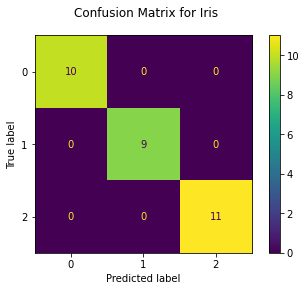

In [56]:
fig = plot_confusion_matrix(mlp, test_data, y_test, display_labels=mlp.classes_)

fig.figure_.suptitle("Confusion Matrix for Iris")
plt.show()

In [57]:
# another ways 

from sklearn.metrics import classification_report

# labels need to be in a list, not np array, so to list
print(classification_report(y_test, pred_test, labels=mlp.classes_.tolist()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [58]:
from sklearn.datasets import fetch_openml

# X is data, y is label
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [59]:
X.shape

(70000, 784)

In [60]:
y.shape

(70000,)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 1/7,
                                                   random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [63]:
print(X_train[0:5])

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
23001     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
31471     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
21970     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
23585     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
10299     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
23001      0.0  ...       0.0       0.0       0.0       0.0       0.0   
31471      0.0  ...       0.0       0.0       0.0       0.0       0.0   
21970      0.0  ...       0.0       0.0       0.0       0.0       0.0   
23585      0.0  ...       0.0       0.0       0.0       0.0       0.0   
10299      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
23001       0.0 

In [64]:
type(X_train)

pandas.core.frame.DataFrame

In [65]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [66]:
type(X_train)

numpy.ndarray

In [67]:
# feature scaling

X_train = X_train / 255
X_test = X_test / 255

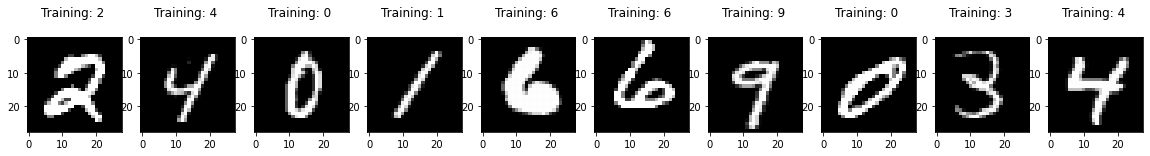

In [71]:
plt.figure(figsize=(20,4))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.gray)
    plt.title("Training: %i \n" % int(y_train.to_numpy()[i]))

In [74]:
from sklearn.neural_network import MLPClassifier

In [81]:
mlp = MLPClassifier(hidden_layer_sizes=(20), max_iter=1000)

In [82]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=20, max_iter=1000)

In [83]:
pred = mlp.predict(X_test)

In [84]:
score = mlp.score(X_test, y_test)
print(score)

0.9429


In [ ]:
print(classification_report(y_test, pred, labels=mlp.classes_.tolist()))

In [96]:
mlp2 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

In [97]:
mlp2.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

In [98]:
pred2 = mlp2.predict(X_test)

In [99]:
score2 = mlp2.score(X_test, y_test)
print(score2)

0.978


In [100]:
print(classification_report(y_test, pred2, labels=mlp.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       0.99      0.99      0.99      1152
           2       0.97      0.98      0.97       967
           3       0.97      0.97      0.97      1034
           4       0.98      0.98      0.98       906
           5       0.98      0.98      0.98       937
           6       0.98      0.99      0.98       961
           7       0.98      0.98      0.98      1055
           8       0.97      0.96      0.97       969
           9       0.98      0.97      0.97      1036

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [85]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

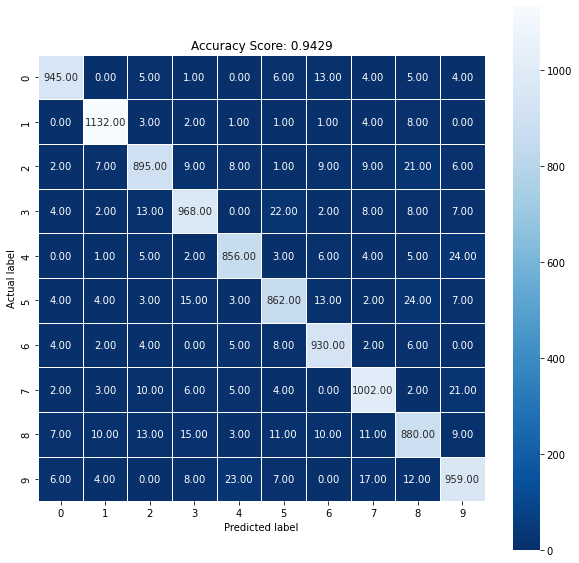

In [89]:
plt.figure(figsize=(10,10))

sns.heatmap(cm, annot=True, fmt='.2f',
           linewidth=0.5, square=True, cmap='Blues_r')

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Accuracy Score: {0}'.format(score))
plt.show()

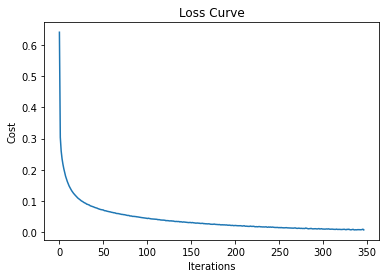

In [90]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()